- 데이터 보안 문제로 출력 부분 삭제 후 업로드

# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

### 문제 정의
> 문자 메시지 스팸 분류 문제<br>
> 1. 문자 메시지 데이터 분석
> 2. 스팸 분류 모델 성능 평가
### 학습 데이터
> * train/validation : spam.csv
> * test : spam_test_text.csv
### 변수 소개
> * text : 문자 메시지
> * label : 스팸여부

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

----

# 데이터 탐색부터 먼저 시작해보겠습니다.

----

### 0. 라이브러리 설치 및 불러오기

In [ ]:
# 필요 라이브러리부터 설치할께요.
# !pip install konlpy pandas seaborn gensim wordcloud

In [1]:
## import sklearn
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf

fm.findSystemFonts()
plt.rcParams['font.family']= ["Malgun Gothic"]
plt.rcParams["axes.unicode_minus"]=False

# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


### 1. 데이터 준비
#### 1-1. 데이터 가져오기

In [2]:
# 데이터를 가져옵니다.
import pandas as pd

data = pd.read_csv('./data/spam.csv')

### 1-2. 데이터 확인하기

In [3]:
# head 함수를 이용해 데이터를 확인해봅니다. (띄어쓰기가 되어 있지 않음을 알 수 있어요.)
data.head()

,text,label
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam


In [4]:
# info() 함수를 이용해서 데이터의 정보를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20089 non-null  object
 1   label   20100 non-null  object
dtypes: object(2)
memory usage: 314.2+ KB


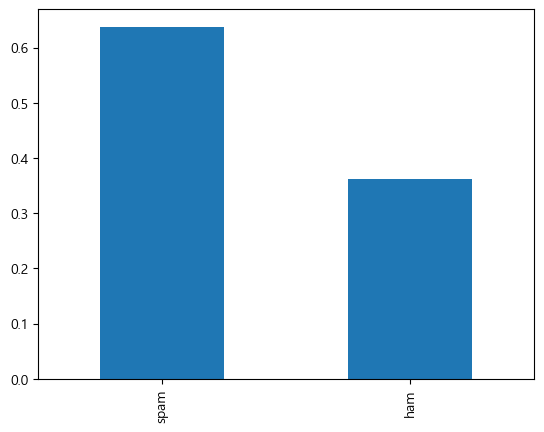

In [5]:
# label 데이터 분포를 확인합니다.
data['label'].value_counts(normalize=True).plot.bar()
plt.show()

In [6]:
# describe 함수를 이용해서 기본 정보를 확인합니다.
data.describe()

,text,label
count,20089,20100
unique,18386,2
top,[Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드,spam
freq,107,12817


#### 1-3. 결측치 제거

In [7]:
# 결측치를 제거한 후 확인합니다.
data = data.dropna(axis=0)

### 2. 텍스트 데이터 분석

#### 2-1. 텍스트 길이 분포 

In [ ]:
# 텍스트 길이 분포와 최대 길이를 확인합니다.
plt.figure(figsize=(10,5))
data.text.str.len().plot.hist(title='max string length: '+str(max(data.text.str.len())))
plt.show()

#### 2-2. 형태소/명사 추출

In [8]:
# konlpy를 활용하여 태깅 클래스를 불러옵니다.
# 태깅 클래스를 활용하여 형태소/명사를 추출합니다.
import nltk
from eunjeon import Mecab
mecab = Mecab()

spam = ' '.join(data.text.explode()) 
spam_morphs = mecab.morphs(spam)
spam_nouns = mecab.nouns(spam)

In [9]:
print('형태소 개수:', len(spam_morphs))
print(spam_morphs[:10])
print()
print('명사 개수:', len(spam_nouns))
print(spam_nouns[:10])

형태소 개수: 540569
['[', 'Web', '발신', ']', '박춘규', '회원', '님', '손절', '주식', '은']

명사 개수: 212384
['발신', '박춘규', '회원', '손절', '주식', '월급', '배', '법', '발신', '골든']


In [12]:
# Number of Samples / Number of words per sample 확인
# https://developers.google.com/machine-learning/guides/text-classification/step-2-5 참고
import numpy as np

spam_morphs_len = np.array([len(spam_morphs[i]) for i in range(len(spam_morphs))])
print(len(spam_morphs)/spam_morphs_len.mean())

306912.2579707009


#### 2-3. NLTK Text로 변환

In [ ]:
# Tokenize한 문자 데이터를 하나의 nltk.Text로 변환합니다.

nltk_spam_morphs = nltk.Text(spam_morphs.explode().to_list())
nltk_spam_nouns = nltk.Text(spam_nouns.explode().fillna('').to_list())

#### 2-4. Frequency plot

In [ ]:
# 형태소/명사 추출 각각 단어 분포를 확인합니다.
plt.figure(figsize=(8,4))
plt.title("형태소 개수 : " + str(len(nltk_spam_morphs.tokens)))
nltk_spam_morphs.plot(10)

plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_spam_nouns.tokens)))
nltk_spam_nouns.plot(10)

plt.show()

#### 2-5. Similar words

In [ ]:
# 어떤 단어(스팸, 주식...)의 유사 단어를 확인합니다.
nltk_spam_nouns.similar('광고')

In [ ]:
nltk_spam_nouns.similar('스팸')

In [ ]:
nltk_spam_nouns.similar('주식')

#### 2-6. Vocabulary

In [ ]:
# 단어 사전을 확인합니다.
nltk_spam_nouns.vocab()

In [ ]:
def extended_extraction(text):
    pos = mecab.pos(text)
    extended_list = []
    for i in range(len(pos)):
        #명사 : NP, NNB, NNP, NNG
        #특수기호 : SF, SY
        if pos[i][1] in('NP','NNB','NNP','NNG','SF','SY'):
            extended_list.append(pos[i][0])
    return extended_list

In [ ]:
token_list = extended_extraction(text)
token_list[:10]

#### 2-7. Collocation

In [ ]:
# 연어(collocation)들을 확인합니다.
nltk_spam_morphs.collocations(window_size=5)
print("*"*50)
nltk_spam_nouns.collocations(window_size=5)

#### 3. WordCloud

In [ ]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('Malgun Gothic')

#### 3-1. Morphs vs Nouns

In [ ]:
# 형태소와 명사 추출 각각에 대해 wordcloud로 확인합니다.
# 형태소 추출
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate(' '.join(nltk_spam_morphs))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# 명사 추출
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate(' '.join(nltk_spam_nouns))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### 3-2. Ham vs Spam

In [ ]:
# 명사 추출한 결과를 Ham과 Spam에 대해 wordcloud로 확인합니다.
ham = data.loc[data['label']=='ham']
spam = data.loc[data['label']=='spam']

In [ ]:
ham_text = ' '.join(ham.text.explode())
spam_text = ' '.join(spam.text.explode())

ha_only_nouns = mecab.nouns(ham_text)
sp_only_nouns = mecab.nouns(spam_text)

nltk_ha_nouns = nltk.Text(ha_only_nouns)
nltk_sp_nouns = nltk.Text(sp_only_nouns)

In [ ]:
# Ham 명사 추출
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate(' '.join(nltk_ha_nouns))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# Spam 명사 추출
wc = WordCloud(font_path=NGC_path, max_font_size=40, background_color="white", collocations=False).generate(' '.join(nltk_sp_nouns))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()